In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [32]:
# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [2]:
os.chdir("C:\\Users\\josh7\\OneDrive\\문서\\데이터 분석 연습")

In [3]:
regular=pd.read_csv("Regular_Season_Batter.csv")

#  1. 데이터 살펴보기

In [60]:
pd.set_option('display.max_columns', 100)
regular.head(10)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
5,1,강경학,2017,한화,0.214,59,84,17,18,2,1,0,22,4,1,1,8,1,19,1,0.262,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.552
6,1,강경학,2018,한화,0.278,77,245,42,68,11,1,5,96,27,6,3,38,4,59,7,0.392,0.382,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.774
7,2,강구성,2013,NC,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000
8,2,강구성,2015,NC,0.200,4,5,0,1,1,0,0,2,0,0,0,0,0,0,0,0.400,0.200,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.600
9,2,강구성,2016,NC,0.000,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.000


In [6]:
#어떤 정보들이 담겨있나..
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

선수이름, 연도, 팀, 타율, 안타갯수(1루타, 2루타, 3루타, 홈런), 장타율, 출루율, OPS, 연봉, 체격 등 다양한 정보들이 담겨있는 것을 확인할 수 있다.

#  2. 시각화 해보기

# 2.1 타율 살펴보기

In [116]:
#팀별 타율 평균
team_avg=regular.groupby(['team'])['avg'].mean()
team_avg.head(100)

team
KIA     0.246399
KT      0.223682
LG      0.227000
NC      0.227946
OB      0.258667
SK      0.252697
넥센      0.240174
두산      0.258250
롯데      0.229524
삼성      0.238015
쌍방울     0.258000
우리      0.198385
한화      0.221178
해태      0.304917
현대      0.246283
히어로즈    0.193769
Name: avg, dtype: float64

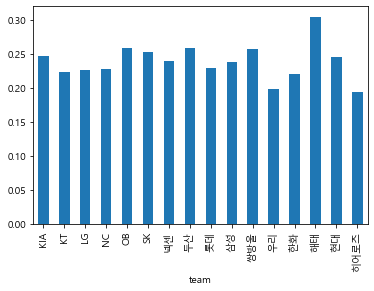

In [112]:
team_avg=regular.groupby(['team'])['avg'].mean().plot(kind='bar')

대부분의 팀이 0.240을 기준으로 평균 타율이 형성되는 것을 알 수 있다.

In [120]:
#연도별 타율 평균

year_avg=regular.groupby(['year'])['avg'].mean()
year_avg.head(30)

year
1993    0.280000
1994    0.196500
1995    0.326000
1996    0.246857
1997    0.257000
1998    0.201100
1999    0.267500
2000    0.248632
2001    0.257656
2002    0.229275
2003    0.224815
2004    0.227147
2005    0.225425
2006    0.239783
2007    0.223585
2008    0.227482
2009    0.241636
2010    0.235938
2011    0.227940
2012    0.218443
2013    0.232395
2014    0.245741
2015    0.236376
2016    0.257745
2017    0.244681
2018    0.246774
Name: avg, dtype: float64

<AxesSubplot:xlabel='year', ylabel='avg'>

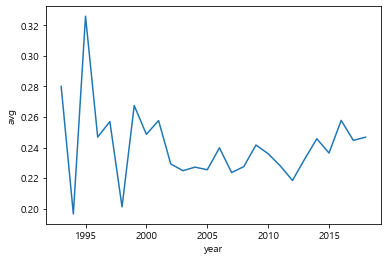

In [118]:
sns.lineplot(data=year_avg)

2000년이전에 데이터가 부족하여 2000년 이전 자료는 정확하지 않음... 

자료는 2002년부터 2010년대까지 0.230~0.240 사이에서 형성되다가 2014년부터 타율이 갑자기 상승하는 모습을 보여준다.


In [87]:
#자료에 전체 평균 타율

regular['avg'].mean()

0.23755930807248726

자료에 전체 평균 타율이 0.240정도... 

전체 평균보다 낮은 2005~2008년 시즌은 실제로도 투고타저 시즌에 해당한다...

또한 2010년 이후 2011년부터 2013년까지 투고타저 시즌이 지속되었고 이후 공인구 반발력을 조정하면서 타저투고 시즌으로 돌입하게 된다.

<AxesSubplot:xlabel='year', ylabel='avg'>

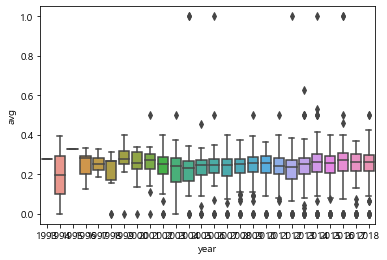

In [94]:
#연도별 타율에 대한 상자수염그림
#https://kimdingko-world.tistory.com/165?category=1194493
sns.boxplot(x="year", y="avg", data=regular)

많은 값들이 outliers에 있음...

이는 타석이 적은 선수들이 많기 때문에 그런것으로 판단됨..(1타수 1안타면 타율이 1.000이고 1타수 0안타이면 타율이 0.000 때문에..)

# 2.2 홈런 살펴보기

In [69]:
#연도별 최다 홈런
year_hr=regular.groupby(['year'])['HR'].max()
year_hr.head(100)

year
1993    16
1994    19
1995    16
1996    30
1997    30
1998    30
1999    24
2000    32
2001    23
2002    38
2003    31
2004    24
2005    26
2006    26
2007    29
2008    31
2009    28
2010    44
2011    30
2012    31
2013    37
2014    52
2015    53
2016    40
2017    46
2018    44
Name: HR, dtype: int64

<AxesSubplot:xlabel='year', ylabel='HR'>

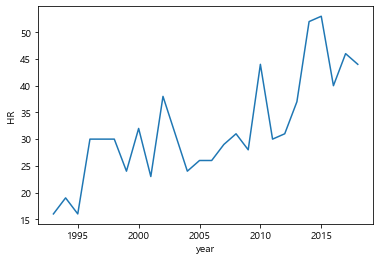

In [68]:
sns.lineplot(data=year_hr)

연도별 최다 홈런 기록은 점차 증가하다가 최근에 감소하는 추세를 보이고 있다.

# 2.3 타석과 OPS의 관계

Text(0, 0.5, 'OPS')

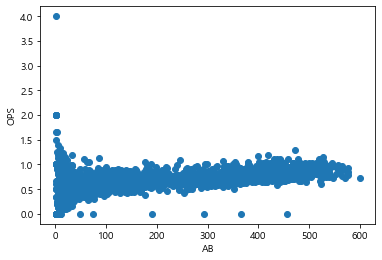

In [144]:
#타석과 ops에 관계
plt.scatter(regular['AB'],regular['OPS'])
plt.xlabel('AB')
plt.ylabel('OPS')

OPS는 출루율과 장타율의 합을 의미.

출루율이란 타자가 얼마만큼 루상에 얼마나 많이 나갔는가(출루했는가)를 백분율로 보여주는 지표.

장타율은 타자의 장타력을 측정하는 지표로 HIT(안타)에 가중치를 두어 합한 수를 타수로 나눈 지표.


자료를 보면 타석이 증가할수록 OPS는 높아지는 것을 볼 수 있다..


# 번외) 강민호 선수의 성적 보기..

최근 3번째 FA를 앞두고 있는 강민호 선수의 방망이가 뜨겁다... 5월 22일 현재 강민호 선수의 타율은 0.342로 리그 7위에 성적을 기록하고 있다.. 과거에도 그가 이렇게까지 높은 고타율을 기록한적이 있을까..? 또 FA를 앞둔 시즌의 성적은 어땠을까?

In [140]:
#강민호 선수의 타율
kang=regular.loc[regular['batter_name']=='강민호'][['year','avg']]
kang.head(100)

,year,avg
42,2004,0.000
43,2005,0.243
44,2006,0.251
45,2007,0.271
46,2008,0.292
47,2009,0.260
48,2010,0.305
49,2011,0.289
50,2012,0.273
51,2013,0.235


<BarContainer object of 15 artists>

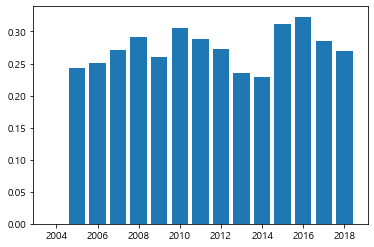

In [143]:
plt.bar(kang['year'], kang['avg'])

그가 기록한 최고 타율은 2016년 0.323이다.. 현재에 0.342을 유지한다면 그의 커리어하이 시즌이 될 것이다... 

그의 첫 FA는 2013년이었다... 

그의 타율은 고작 0.235였지만.. 그는 4년 75억에 롯데와 계약한다.. 롯데는 왜 강민호에게 많은 돈을 주었을까???? 아마도 강민호의 포지션이 포수라는 점.. 2013년 이전까지 0.270 이상의 타율을 기록했다는 점을 인정했던것일까?


그의 두번째 FA는 2017년이었고 그는 0.285라는 준수한 타율과 직전년도 0.323이라는 고타율을 기록하면서 4년 80억에 삼성으로 이적한다...

삼성 이적후 2018년 0.269, 2019년 0.234, 2020년 0.287을 차례로 기록했고 올해 그의 타율은 0.342... 이 기록을 유지한다면 또 한번의 FA대박을 꿈꿀 수 있을 것이다..

현재 그의 나이는 37세로 곧 은퇴를 앞두고 있지만.. 마지막이 될수도 있는 FA에서 과연 얼마를 받게될까??